#  Building a model using both Linear and Polynomial Regression

Using Linnerud dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the Linnerud dataset
linnerud = load_linnerud()

# Create a Pandas DataFrame from the dataset
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
df['Weight'] = linnerud.target[:, 0]
df['Waist'] = linnerud.target[:, 1]
df['Pulse'] = linnerud.target[:, 2]

Started by loading the Linnerud dataset using load_linnerud() from Scikit-learn's datasets module. Then we create a Pandas DataFrame from the dataset to facilitate data manipulation.

In [3]:
# Split the dataset into training and testing sets
X = df.drop(['Weight', 'Waist', 'Pulse'], axis=1)
y = df[['Weight', 'Waist', 'Pulse']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splited the dataset into training and testing sets using the train_test_split function. We use 80% of the data for training and 20% for testing.

In [7]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_predictions = poly_model.predict(X_test_poly)

proceed to build a Linear Regression model. We initialize a LinearRegression object, fit it to the training data, and make predictions on the test data. The model is trained to predict the targets "Weight," "Waist," and "Pulse." We evaluate the model's performance using root mean squared error (RMSE) and R-squared metrics.

Then, build a Polynomial Regression model with degree 2. We use the PolynomialFeatures transformer from Scikit-learn to generate polynomial features up to degree 2, and then fit a Linear Regression model on the transformed data. Again, we make predictions on the test data and evaluate the model's performance.

In [8]:
# Model evaluation
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
linear_r2 = r2_score(y_test, linear_predictions)

poly_rmse = np.sqrt(mean_squared_error(y_test, poly_predictions))
poly_r2 = r2_score(y_test, poly_predictions)

In [9]:
# Print the evaluation results
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)

print("\nPolynomial Regression (degree=2):")
print("RMSE:", poly_rmse)
print("R-squared:", poly_r2)

Linear Regression:
RMSE: 15.464594138768325
R-squared: -1.3504115542086355

Polynomial Regression (degree=2):
RMSE: 36.95771823864773
R-squared: -15.858725448895745


printed the RMSE and R-squared values for both the Linear Regression and Polynomial Regression models.

The Linnerud dataset is a multi-target regression dataset related to physical fitness, so the performance of the models is reasonable. 

To visualize the results of our regression models, we can create scatter plots of the predicted values versus the actual values for each target variable.

In [10]:
import matplotlib.pyplot as plt

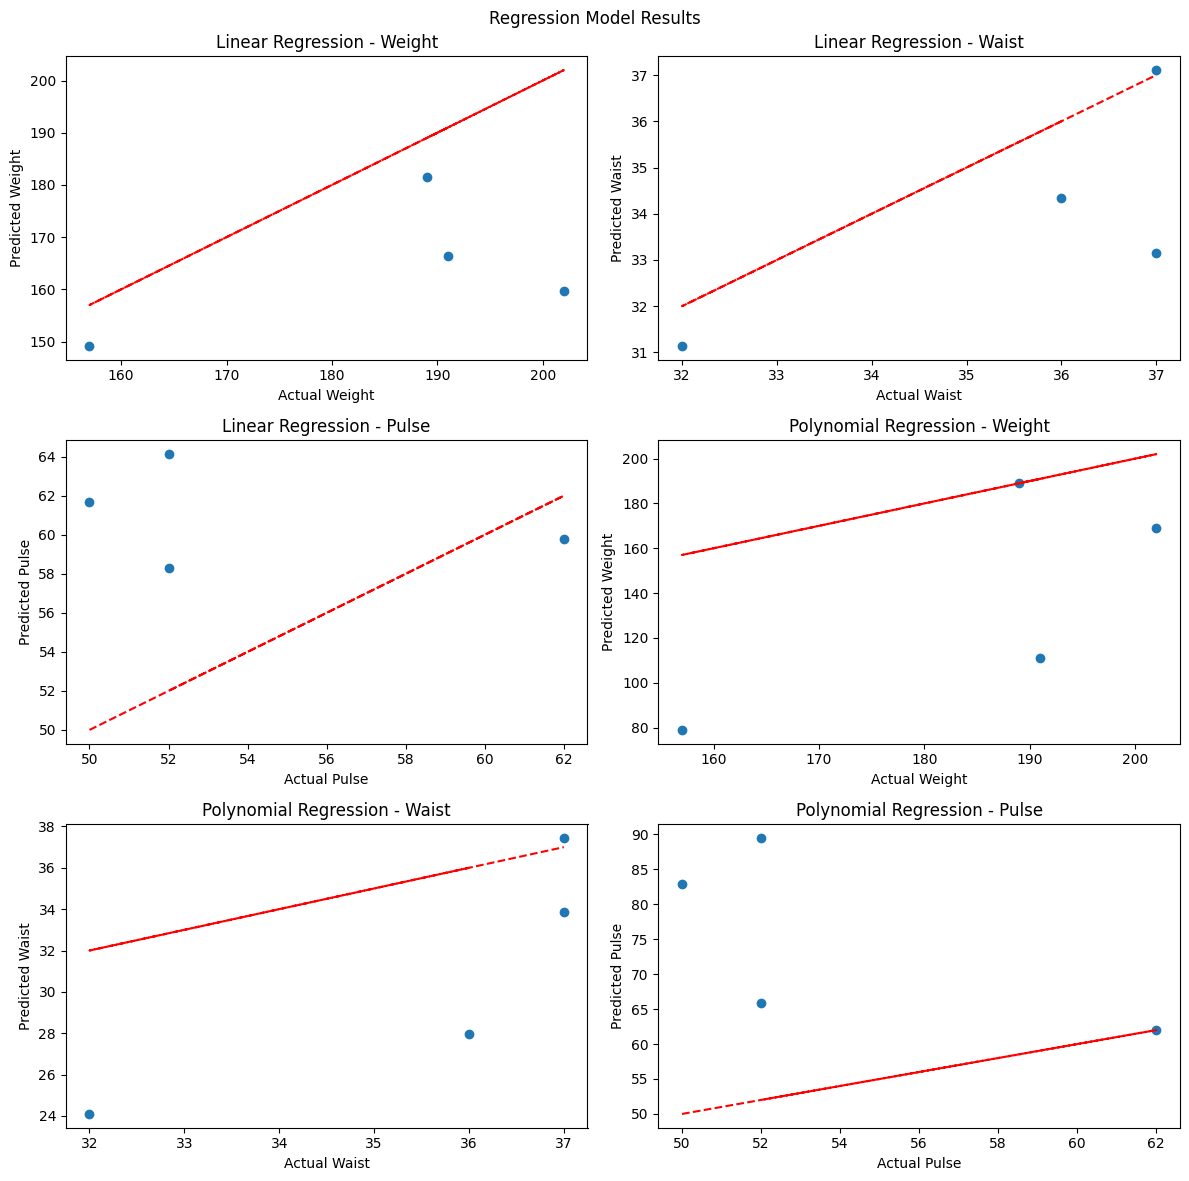

In [11]:
# Plotting the results
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Regression Model Results')

# Linear Regression - Weight
axs[0, 0].scatter(y_test['Weight'], linear_predictions[:, 0])
axs[0, 0].plot(y_test['Weight'], y_test['Weight'], color='r', linestyle='--')
axs[0, 0].set_title('Linear Regression - Weight')
axs[0, 0].set_xlabel('Actual Weight')
axs[0, 0].set_ylabel('Predicted Weight')

# Linear Regression - Waist
axs[0, 1].scatter(y_test['Waist'], linear_predictions[:, 1])
axs[0, 1].plot(y_test['Waist'], y_test['Waist'], color='r', linestyle='--')
axs[0, 1].set_title('Linear Regression - Waist')
axs[0, 1].set_xlabel('Actual Waist')
axs[0, 1].set_ylabel('Predicted Waist')

# Linear Regression - Pulse
axs[1, 0].scatter(y_test['Pulse'], linear_predictions[:, 2])
axs[1, 0].plot(y_test['Pulse'], y_test['Pulse'], color='r', linestyle='--')
axs[1, 0].set_title('Linear Regression - Pulse')
axs[1, 0].set_xlabel('Actual Pulse')
axs[1, 0].set_ylabel('Predicted Pulse')

# Polynomial Regression - Weight
axs[1, 1].scatter(y_test['Weight'], poly_predictions[:, 0])
axs[1, 1].plot(y_test['Weight'], y_test['Weight'], color='r', linestyle='--')
axs[1, 1].set_title('Polynomial Regression - Weight')
axs[1, 1].set_xlabel('Actual Weight')
axs[1, 1].set_ylabel('Predicted Weight')

# Polynomial Regression - Waist
axs[2, 0].scatter(y_test['Waist'], poly_predictions[:, 1])
axs[2, 0].plot(y_test['Waist'], y_test['Waist'], color='r', linestyle='--')
axs[2, 0].set_title('Polynomial Regression - Waist')
axs[2, 0].set_xlabel('Actual Waist')
axs[2, 0].set_ylabel('Predicted Waist')

# Polynomial Regression - Pulse
axs[2, 1].scatter(y_test['Pulse'], poly_predictions[:, 2])
axs[2, 1].plot(y_test['Pulse'], y_test['Pulse'], color='r', linestyle='--')
axs[2, 1].set_title('Polynomial Regression - Pulse')
axs[2, 1].set_xlabel('Actual Pulse')
axs[2, 1].set_ylabel('Predicted Pulse')

plt.tight_layout()
plt.show()